<a href="https://colab.research.google.com/github/jyosa/ProtPred/blob/main/proteinStrPredicc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Inteligencia Artificial y la Predicción de Estructura de Proteínas

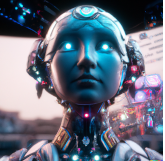
# IA Abierta LATAM


Antes de iniciar el workbook puede leer el artículo sobre la predicción de proteínas y la inteligencia artificial [aquí](https://juvenalyosa.wixsite.com/ia-abierta-latam/post/la-inteligencia-artificial-y-la-predicci%C3%B3n-de-estructuras-de-prote%C3%ADnas).

El siguiente código predice la estructura de proteinas usando alphafold2 con MSA y ESMFold con transformers de Meta.



Vamos a predecir la estructura de la subunidad alfa de la heglobina del Felis catus ussando AlphaFold y ESMFold,  finalmente comparamos con el cristal. [Aquí](https://www.ncbi.nlm.nih.gov/protein/XP_003999021.1?report=fasta) la secuencia de aminoácidos, y la [estructura](https://www.rcsb.org/structure/3D4X). Antes de iniciar active la GPU [así](https://www.youtube.com/watch?v=TI9mTiTKoUc)

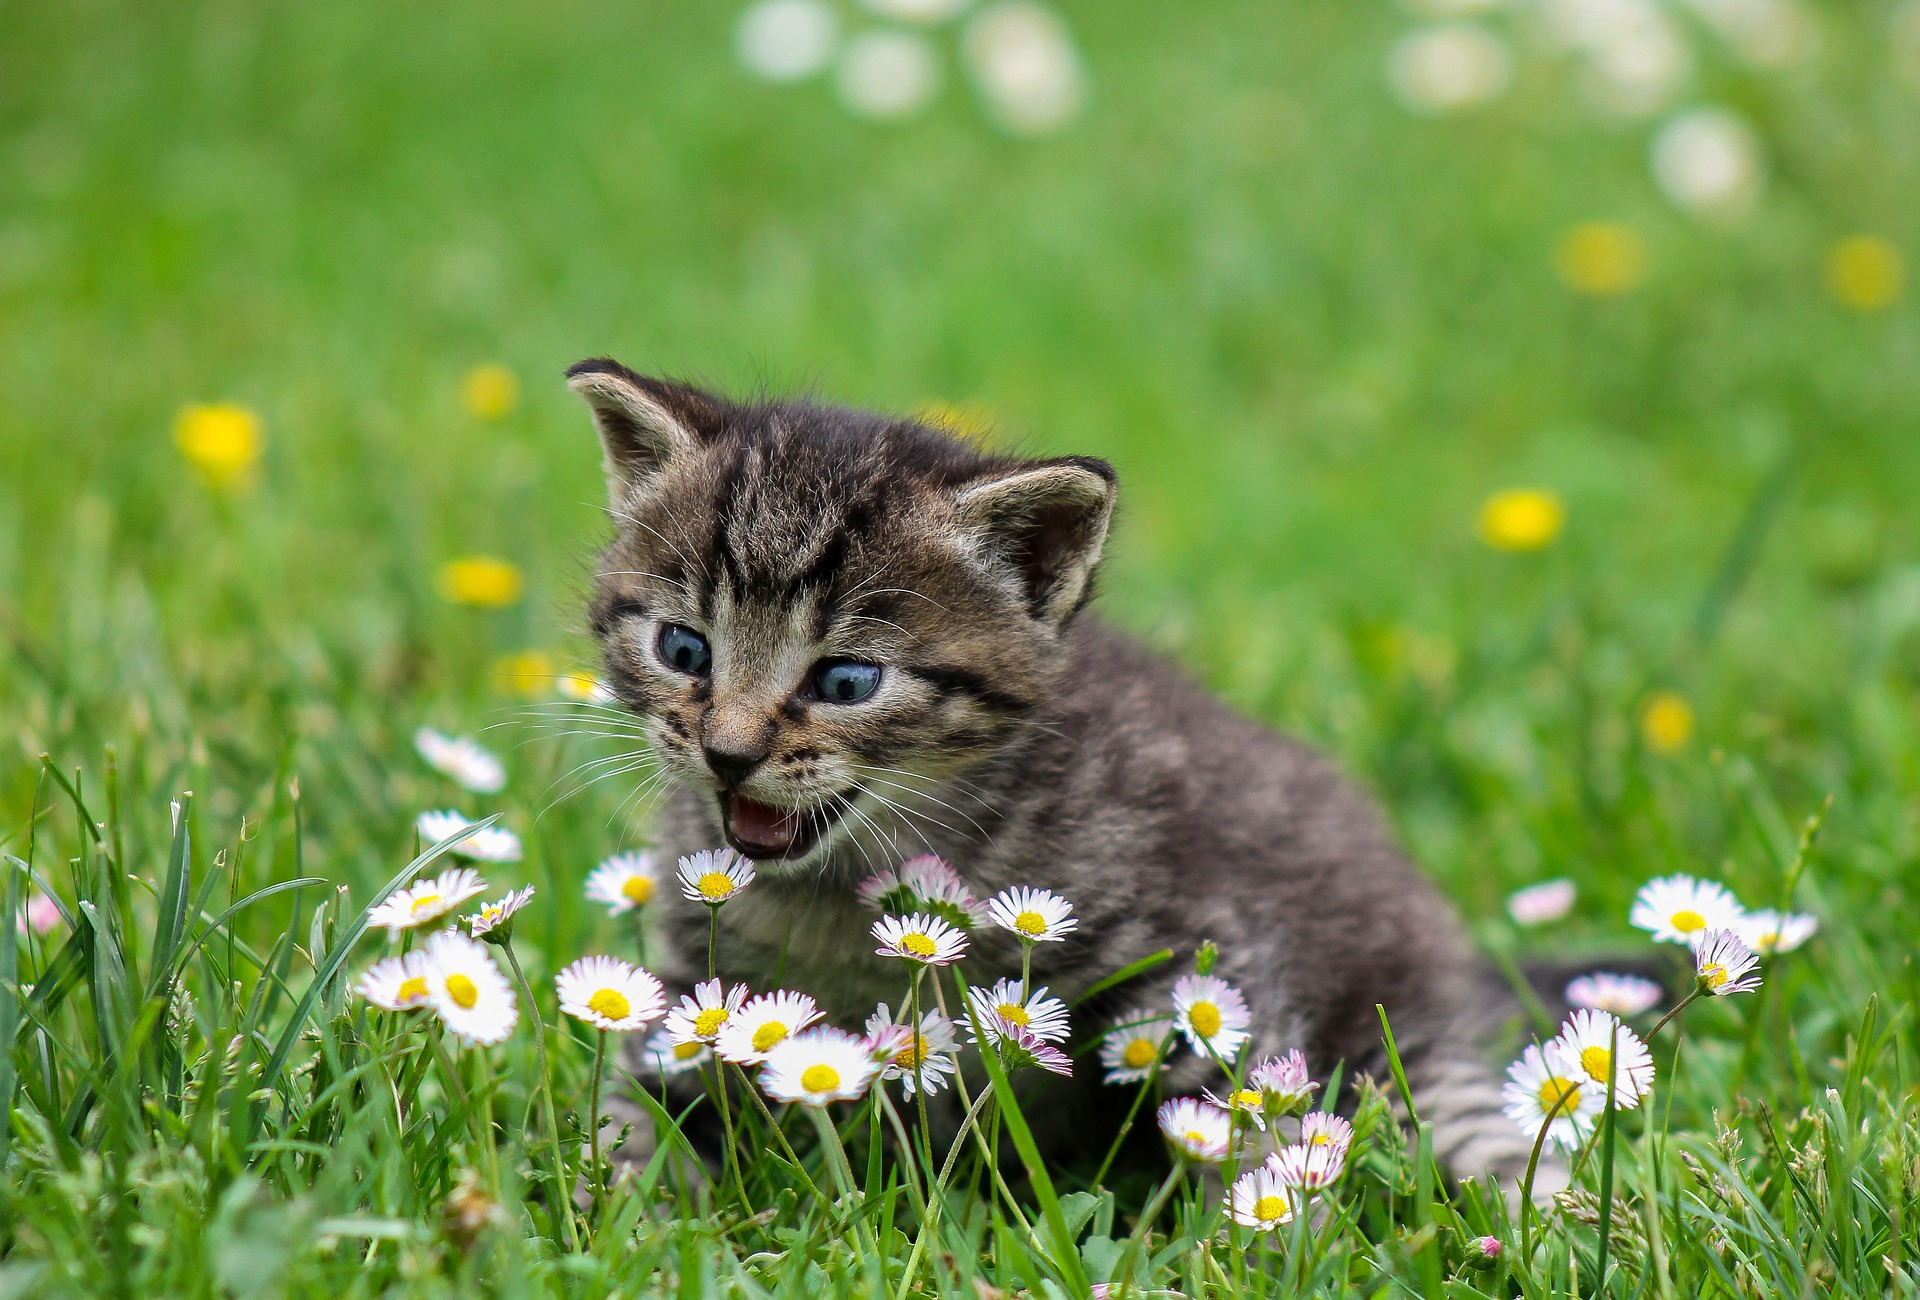

## AlphaFold2

Inicialmente se instalarán las dependencias necesarias para correr el programa, posteriormente puede copiar y pegar la secuencia de aminoácidos, y dar un nombre al projecto que in¡niciará.

Para proceder con la simulación simplemente hay que dar click en el ícono 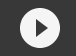 en cada celda.

In [4]:
#@title Click para instalar dependencia y programas
%%bash -s $use_amber $use_templates

set -e

USE_AMBER=$1
USE_TEMPLATES=$2

if [ ! -f COLABFOLD_READY ]; then
  # install dependencies
  # We have to use "--no-warn-conflicts" because colab already has a lot preinstalled with requirements different to ours
  pip install jaxlib
  # high risk high gain
  #pip install --upgrade jax jaxlib==0.1.70+cuda110 -f https://storage.googleapis.com/jax-releases/jax_releases.html
  touch COLABFOLD_READY
fi

# setup conda
if [ ${USE_AMBER} == "True" ] || [ ${USE_TEMPLATES} == "True" ]; then
  if [ ! -f CONDA_READY ]; then
    wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
    bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local 2>&1 1>/dev/null
    rm Miniconda3-latest-Linux-x86_64.sh
    touch CONDA_READY
  fi
fi
# setup template search
if [ ${USE_TEMPLATES} == "True" ] && [ ! -f HH_READY ]; then
  conda install -y -q -c conda-forge -c bioconda kalign2=2.04 hhsuite=3.3.0 python=3.7 2>&1 1>/dev/null
  touch HH_READY
fi
# setup openmm for amber refinement
if [ ${USE_AMBER} == "True" ] && [ ! -f AMBER_READY ]; then
  conda install -y -q -c conda-forge openmm=7.5.1 python=3.7 pdbfixer 2>&1 1>/dev/null
  touch AMBER_READY
fi

In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


Mounted at /content/drive


2023-06-27 19:14:01,381 Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: Interpreter CUDA Host
2023-06-27 19:14:01,382 Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
2023-06-27 19:14:01,383 Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-06-27 19:14:03,744 Running on GPU
2023-06-27 19:14:03,842 Found 4 citations for tools or databases
2023-06-27 19:14:03,842 Query 1/1: hemo_91063 (length 141)


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


2023-06-27 19:14:05,494 Setting max_seq=512, max_extra_seq=3845
2023-06-27 19:15:05,751 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=95.9 pTM=0.897
2023-06-27 19:15:15,929 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=96.7 pTM=0.901 tol=0.126
2023-06-27 19:15:26,277 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=96.9 pTM=0.901 tol=0.0475
2023-06-27 19:15:36,800 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=96.9 pTM=0.901 tol=0.0386
2023-06-27 19:15:36,802 alphafold2_ptm_model_1_seed_000 took 72.6s (3 recycles)


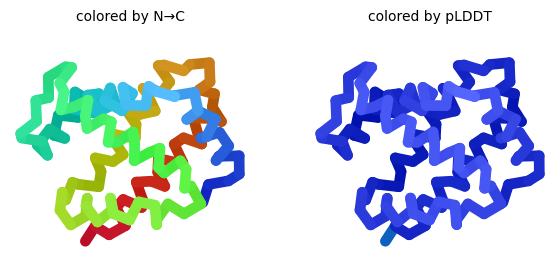

2023-06-27 19:15:47,788 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=95.7 pTM=0.9
2023-06-27 19:15:58,666 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=96.2 pTM=0.903 tol=0.198
2023-06-27 19:16:09,791 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=96.5 pTM=0.904 tol=0.0372
2023-06-27 19:16:21,046 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=96.6 pTM=0.904 tol=0.0324
2023-06-27 19:16:21,048 alphafold2_ptm_model_2_seed_000 took 44.0s (3 recycles)


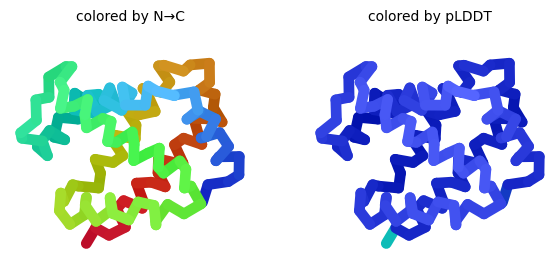

2023-06-27 19:16:32,849 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=96.7 pTM=0.909
2023-06-27 19:16:43,904 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=97.2 pTM=0.912 tol=0.131
2023-06-27 19:16:54,875 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=97.2 pTM=0.912 tol=0.051
2023-06-27 19:17:05,826 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=97.3 pTM=0.912 tol=0.0303
2023-06-27 19:17:05,828 alphafold2_ptm_model_3_seed_000 took 44.1s (3 recycles)


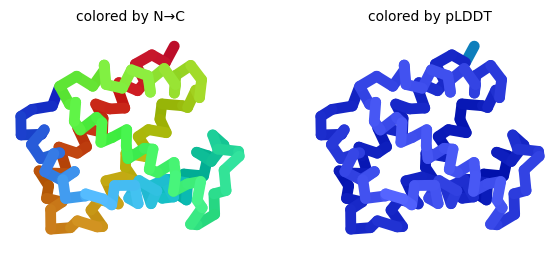

2023-06-27 19:17:17,018 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=96.2 pTM=0.904
2023-06-27 19:17:28,001 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=97.2 pTM=0.909 tol=0.22
2023-06-27 19:17:38,999 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=97.4 pTM=0.911 tol=0.0613
2023-06-27 19:17:50,035 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=97.4 pTM=0.911 tol=0.0377
2023-06-27 19:17:50,037 alphafold2_ptm_model_4_seed_000 took 43.9s (3 recycles)


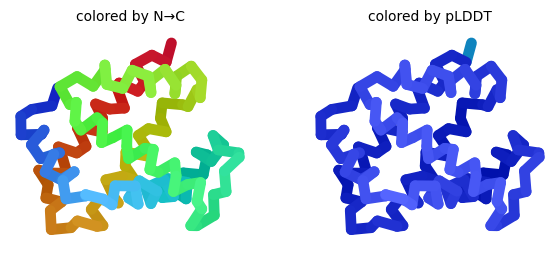

2023-06-27 19:18:01,343 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=96 pTM=0.902
2023-06-27 19:18:12,376 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=97.1 pTM=0.907 tol=0.22
2023-06-27 19:18:23,394 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=97.2 pTM=0.908 tol=0.0696
2023-06-27 19:18:34,413 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=97.1 pTM=0.906 tol=0.0415
2023-06-27 19:18:34,414 alphafold2_ptm_model_5_seed_000 took 44.1s (3 recycles)


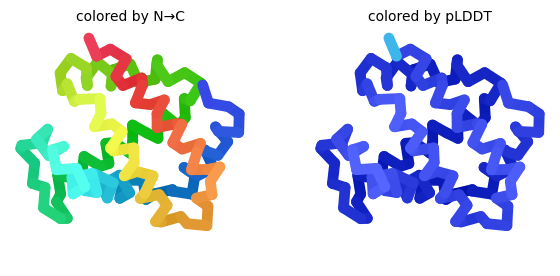

2023-06-27 19:18:34,703 reranking models by 'plddt' metric
2023-06-27 19:18:34,704 rank_001_alphafold2_ptm_model_4_seed_000 pLDDT=97.4 pTM=0.911
2023-06-27 19:18:34,705 rank_002_alphafold2_ptm_model_3_seed_000 pLDDT=97.3 pTM=0.912
2023-06-27 19:18:34,706 rank_003_alphafold2_ptm_model_5_seed_000 pLDDT=97.1 pTM=0.906
2023-06-27 19:18:34,707 rank_004_alphafold2_ptm_model_1_seed_000 pLDDT=96.9 pTM=0.901
2023-06-27 19:18:34,707 rank_005_alphafold2_ptm_model_2_seed_000 pLDDT=96.6 pTM=0.904
2023-06-27 19:18:38,180 Done


{'rank': [['rank_001_alphafold2_ptm_model_4_seed_000',
   'rank_002_alphafold2_ptm_model_3_seed_000',
   'rank_003_alphafold2_ptm_model_5_seed_000',
   'rank_004_alphafold2_ptm_model_1_seed_000',
   'rank_005_alphafold2_ptm_model_2_seed_000']],
 'metric': [[{'mean_plddt': 97.375,
    'ptm': 0.91064453125,
    'print_line': ' pLDDT=97.4 pTM=0.911'},
   {'mean_plddt': 97.3125,
    'ptm': 0.912109375,
    'print_line': ' pLDDT=97.3 pTM=0.912'},
   {'mean_plddt': 97.0625,
    'ptm': 0.90576171875,
    'print_line': ' pLDDT=97.1 pTM=0.906'},
   {'mean_plddt': 96.9375,
    'ptm': 0.9013671875,
    'print_line': ' pLDDT=96.9 pTM=0.901'},
   {'mean_plddt': 96.625,
    'ptm': 0.904296875,
    'print_line': ' pLDDT=96.6 pTM=0.904'}]]}

In [5]:
#@title Ingrese la secuencia de aminoácidos y un nobre al proyecto (corriendo AlphaFold2):
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)


from google.colab import files
import os.path
import re
import hashlib
import random
from colabfold.colabfold import plot_protein
from pathlib import Path
import matplotlib.pyplot as plt
import sys
from colabfold.download import download_alphafold_params, default_data_dir
from colabfold.utils import setup_logging
from colabfold.batch import get_queries, run, set_model_type


def add_hash(x,y):
  return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

query_sequence = 'VLSAADKSNVKACWGKIGSHAGEYGAEALERTFCSFPTTKTYFPHFDLSHGSAQVKAHGQKVADALTQAVAHMDDLPTAMSALSDLHAYKLRVDPVNFKFLSHCLLVTLACHHPAEFTPAVHASLDKFFSAVSTVLTSKYR' #@param {type:"string"}

# remove whitespaces
query_sequence = "".join(query_sequence.split())

jobname = 'hemo' #@param {type:"string"}
# remove whitespaces
basejobname = "".join(jobname.split())
basejobname = re.sub(r'\W+', '', basejobname)
jobname = add_hash(basejobname, query_sequence)
while os.path.isfile(f"{jobname}.csv"):
  jobname = add_hash(basejobname, ''.join(random.sample(query_sequence,len(query_sequence))))

with open(f"{jobname}.csv", "w") as text_file:
    text_file.write(f"id,sequence\n{jobname},{query_sequence}")

queries_path=f"{jobname}.csv"

use_amber = False
template_mode = "none"
custom_template_path = None
use_templates = False
msa_mode = "MMseqs2 (UniRef+Environmental)"
pair_mode = "unpaired+paired"
a3m_file = f"{jobname}.a3m"
model_type = "auto"
num_models = 5
num_recycles = 3

Google_Drive_Path = './'
workDir = Google_Drive_Path



K80_chk = !nvidia-smi | grep "Tesla K80" | wc -l
if "1" in K80_chk:
  print("WARNING: found GPU Tesla K80: limited to total length < 1000")
  if "TF_FORCE_UNIFIED_MEMORY" in os.environ:
    del os.environ["TF_FORCE_UNIFIED_MEMORY"]
  if "XLA_PYTHON_CLIENT_MEM_FRACTION" in os.environ:
    del os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]




# For some reason we need that to get pdbfixer to import
if use_amber and '/usr/local/lib/python3.7/site-packages/' not in sys.path:
    sys.path.insert(0, '/usr/local/lib/python3.7/site-packages/')

def prediction_callback(unrelaxed_protein, length, prediction_result, input_features, type):
  fig = plot_protein(unrelaxed_protein, Ls=length, dpi=100)
  plt.show()
  plt.close()

result_dir="."
setup_logging(Path(".").joinpath("log.txt"))
queries, is_complex = get_queries(queries_path)
model_type = set_model_type(is_complex, model_type)
download_alphafold_params(model_type, Path("."))
run(
    queries=queries,
    result_dir=result_dir,
    use_templates=use_templates,
    custom_template_path=custom_template_path,
    use_amber=use_amber,
    msa_mode=msa_mode,
    model_type=model_type,
    num_models=num_models,
    num_recycles=num_recycles,
    model_order=[1, 2, 3, 4, 5],
    is_complex=is_complex,
    data_dir=Path("."),
    keep_existing_results=False,
    recompile_padding=1.0,
    rank_by="auto",
    pair_mode=pair_mode,
    stop_at_score=float(100),
    prediction_callback=prediction_callback,
)


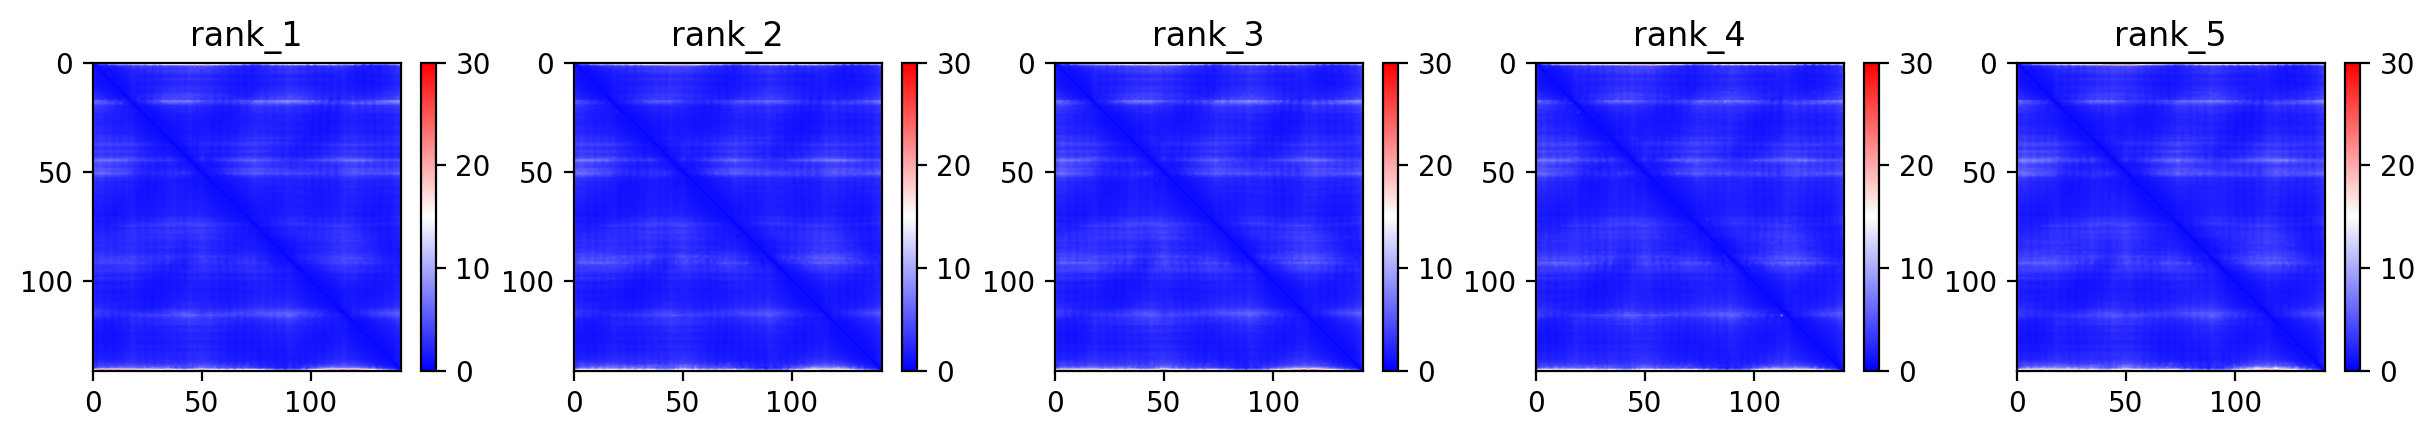
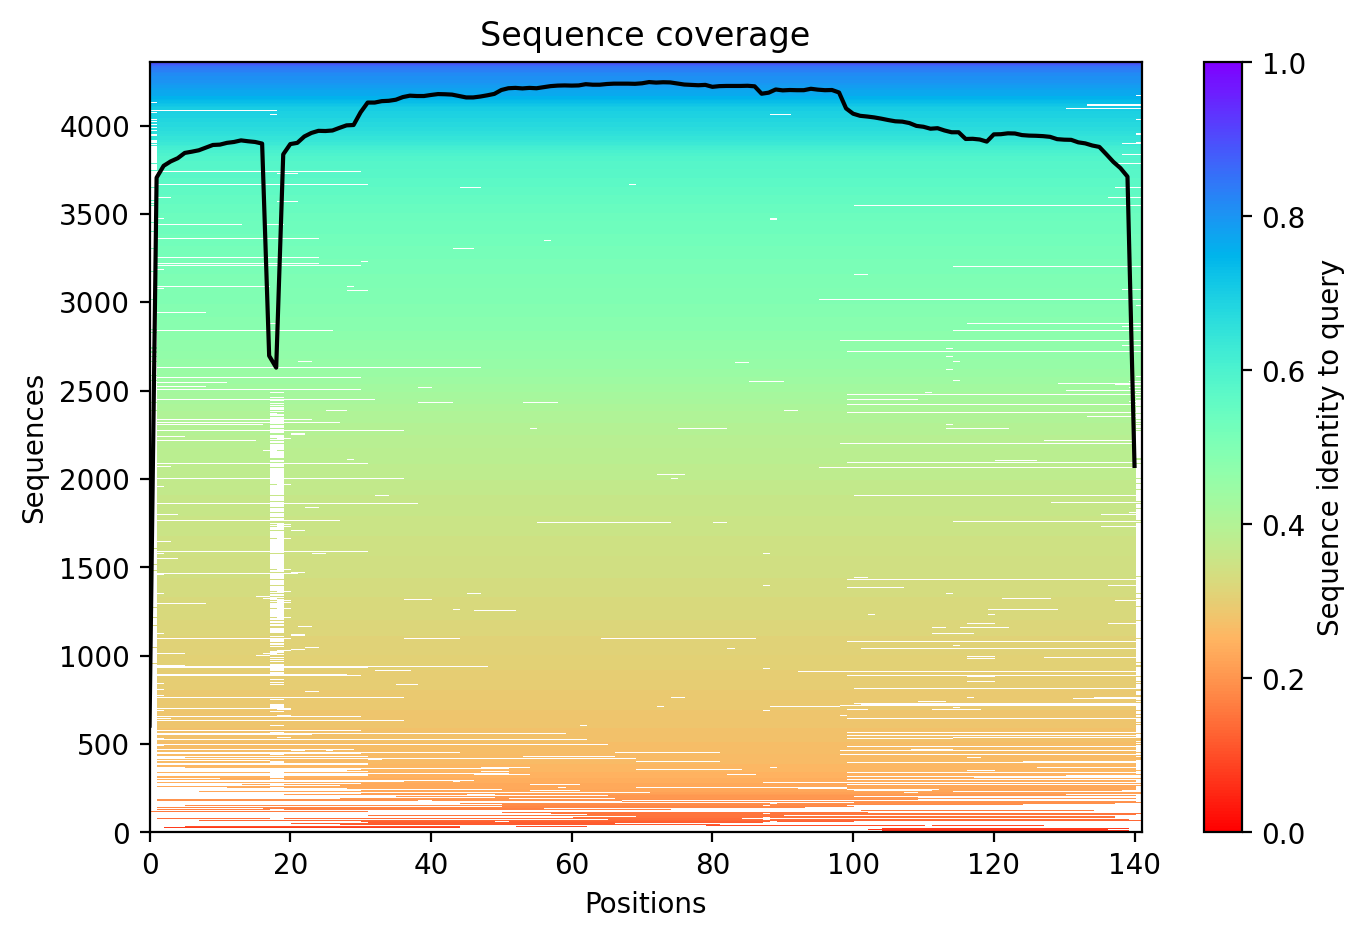
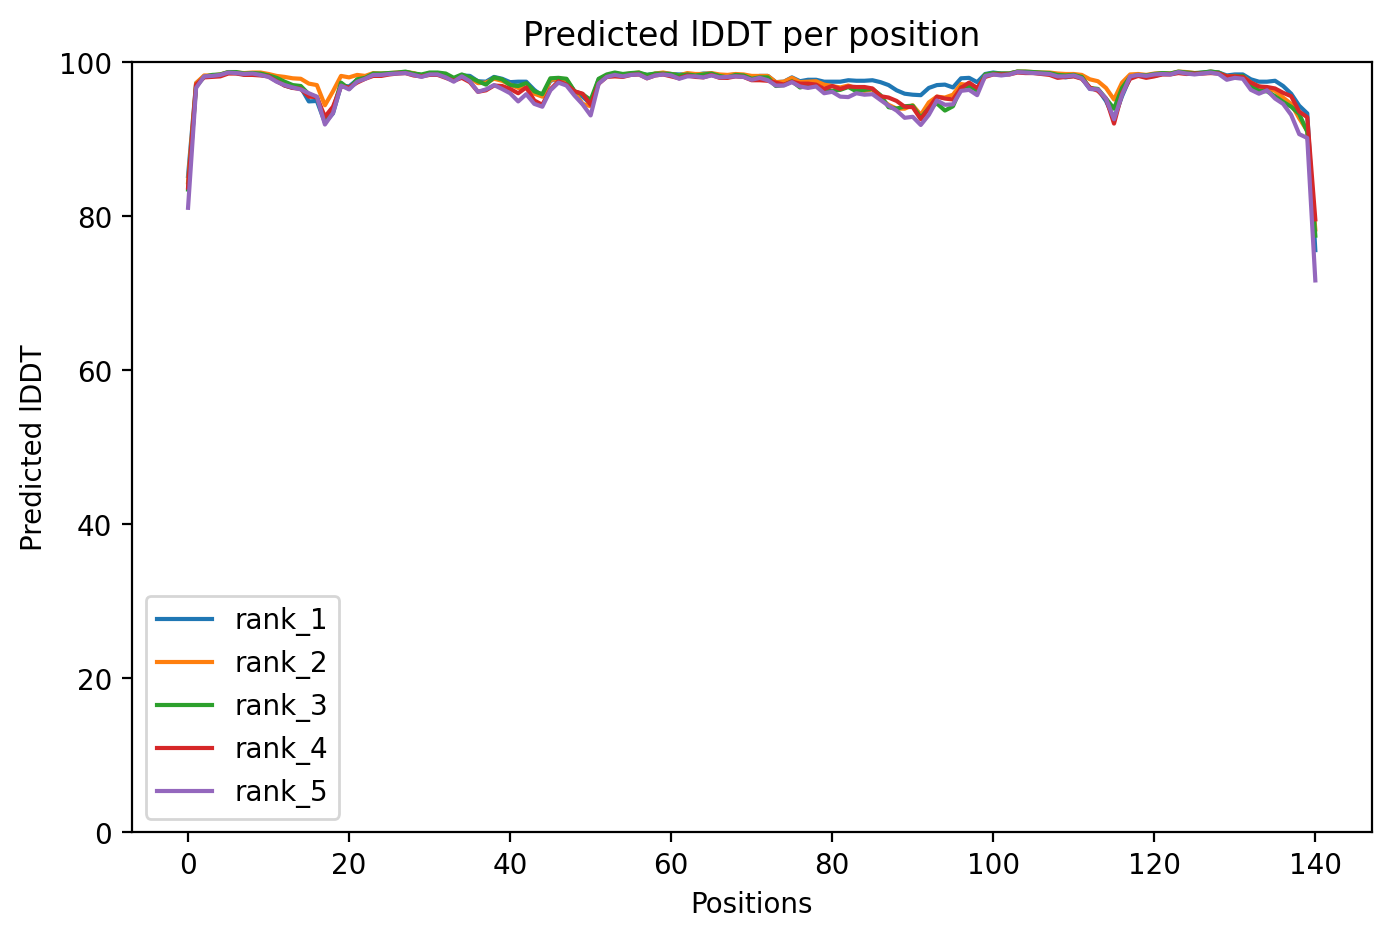

In [9]:
#@title Resultados

from IPython.display import display, HTML
import base64
from html import escape

def image_to_data_url(filename):
  ext = filename.split('.')[-1]
  prefix = f'data:image/{ext};base64,'
  with open(filename, 'rb') as f:
    img = f.read()
  return prefix + base64.b64encode(img).decode('utf-8')

for filename in os.listdir("./"):
  if filename.startswith(jobname) and  filename.endswith("_pae.png"):
    paevar = filename
  elif filename.startswith(jobname) and  filename.endswith("_coverage.png"):
    covvar = filename
  elif filename.startswith(jobname) and  filename.endswith("_plddt.png"):
    plddtvar = filename

pae = image_to_data_url(paevar)
cov = image_to_data_url(covvar)
plddt = image_to_data_url(plddtvar)
display(HTML(f"""
<style>
  img {{
    float:left;
  }}
  .full {{
    max-width:100%;
  }}
  .half {{
    max-width:50%;
  }}
  @media (max-width:640px) {{
    .half {{
      max-width:100%;
    }}
  }}
</style>
<div style="max-width:90%; padding:2em;">
  <h1>Gráficas para {escape(jobname)}</h1>
  <img src="{pae}" class="full" />
  <img src="{cov}" class="half" />
  <img src="{plddt}" class="half" />
</div>
"""))


In [20]:
#@title Estructura 3D Predicción AlphaFold {run: "auto"}

import py3Dmol
import glob
import matplotlib.pyplot as plt
rank_num = 1 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
color = "lDDT" #@param ["chain", "lDDT", "rainbow"]
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}

jobname_prefix = ".custom" if msa_mode == "custom" else ""
if use_amber:
  pdb_filename = f"{jobname}{jobname_prefix}_relaxed_rank_{rank_num}_model_*.pdb"

  # Get the list of pdb files
  pdb_files = glob.glob("hemo_*_relaxed_rank_*_alphafold2_ptm_model_*_seed_*.pdb")

  # Regular expression to extract the rank number from the filename
  rank_regex = re.compile(r"hemo_(\d+)_relaxed_rank_(\d+)_alphafold2_ptm_model_(\d+)_seed_(\d+)\.pdb")

  # Sort the files by the rank number
  pdb_files_sorted = sorted(pdb_files, key=lambda f: [int(x) for x in rank_regex.match(f).groups()])
else:
  pdb_filename = f"{jobname}{jobname_prefix}_unrelaxed_rank_{rank_num}_model_*.pdb"

  # Get the list of pdb files
  pdb_files = glob.glob("hemo_*_unrelaxed_rank_*_alphafold2_ptm_model_*_seed_*.pdb")

  # Regular expression to extract the rank number from the filename
  rank_regex = re.compile(r"hemo_(\d+)_unrelaxed_rank_(\d+)_alphafold2_ptm_model_(\d+)_seed_(\d+)\.pdb")

  # Sort the files by the rank number
  pdb_files_sorted = sorted(pdb_files, key=lambda f: [int(x) for x in rank_regex.match(f).groups()])




pdb_file = pdb_files_sorted
print(pdb_filename)

for file in pdb_file:
    print(file)

def show_pdb(rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
  model_name = f"rank_{rank_num}"
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(open(pdb_file[0],'r').read(),'pdb')

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(queries[0][1]) + 1 if is_complex else 1
    for n,chain,color in zip(range(chains),list("ABCDEFGH"),
                     ["lime","cyan","magenta","yellow","salmon","white","blue","orange"]):
      view.setStyle({'chain':chain},{'cartoon': {'color':color}})
  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view


show_pdb(rank_num,show_sidechains, show_mainchains, color).show()

hemo_91063_unrelaxed_rank_1_model_*.pdb
hemo_91063_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb
hemo_91063_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb
hemo_91063_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb
hemo_91063_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb
hemo_91063_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# ESMFold modelo del lenguaje

Para proteínas monoméricas cortas de menos de 400 de longitud, considere usar la API ESMFold (sin necesidad de GPU

En Tesla T4 (GPU típica de colaboración gratuita), longitud total máxima ~ 900


In [21]:
%%time
#@title Instalando dependencias, se instalará OpenFold y el modelo ESM, el proceso toma algunos minutos!

import os, time
if not os.path.isfile("esmfold.model"):
  # download esmfold params
  os.system("apt-get install aria2 -qq")
  os.system("aria2c -q -x 16 https://colabfold.steineggerlab.workers.dev/esm/esmfold.model &")

  # install libs
  os.system("pip install -q omegaconf pytorch_lightning biopython ml_collections einops py3Dmol")
  os.system("pip install -q git+https://github.com/NVIDIA/dllogger.git")

  # install openfold
  commit = "6908936b68ae89f67755240e2f588c09ec31d4c8"
  os.system(f"pip install -q git+https://github.com/aqlaboratory/openfold.git@{commit}")

  # install esmfold
  os.system(f"pip install -q git+https://github.com/sokrypton/esm.git")

  # wait for Params to finish downloading...
  if not os.path.isfile("esmfold.model"):
    # backup source!
    os.system("aria2c -q -x 16 https://files.ipd.uw.edu/pub/esmfold/esmfold.model")
  else:
    while os.path.isfile("esmfold.model.aria2"):
      time.sleep(5)

CPU times: user 950 ms, sys: 206 ms, total: 1.16 s
Wall time: 3min 47s


In [1]:
#@title ##Iniciar predicción  **ESMFold**
%%time
from string import ascii_uppercase, ascii_lowercase
import hashlib, re, os
import numpy as np
from jax.tree_util import tree_map
import matplotlib.pyplot as plt
from scipy.special import softmax

def parse_output(output):
  pae = (output["aligned_confidence_probs"][0] * np.arange(64)).mean(-1) * 31
  plddt = output["plddt"][0,:,1]

  bins = np.append(0,np.linspace(2.3125,21.6875,63))
  sm_contacts = softmax(output["distogram_logits"],-1)[0]
  sm_contacts = sm_contacts[...,bins<8].sum(-1)
  xyz = output["positions"][-1,0,:,1]
  mask = output["atom37_atom_exists"][0,:,1] == 1
  o = {"pae":pae[mask,:][:,mask],
       "plddt":plddt[mask],
       "sm_contacts":sm_contacts[mask,:][:,mask],
       "xyz":xyz[mask]}
  return o

def get_hash(x): return hashlib.sha1(x.encode()).hexdigest()
alphabet_list = list(ascii_uppercase+ascii_lowercase)

jobname = "hemoESM" #@param {type:"string"}
jobname = re.sub(r'\W+', '', jobname)[:50]

sequence = "VLSAADKSNVKACWGKIGSHAGEYGAEALERTFCSFPTTKTYFPHFDLSHGSAQVKAHGQKVADALTQAVAHMDDLPTAMSALSDLHAYKLRVDPVNFKFLSHCLLVTLACHHPAEFTPAVHASLDKFFSAVSTVLTSKYR" #@param {type:"string"}
sequence = re.sub("[^A-Z:]", "", sequence.replace("/",":").upper())
sequence = re.sub(":+",":",sequence)
sequence = re.sub("^[:]+","",sequence)
sequence = re.sub("[:]+$","",sequence)

copies = 1 #@param {type:"integer"}
if copies == "" or copies <= 0: copies = 1
sequence = ":".join([sequence] * copies)
num_recycles = 3 #@param ["0", "1", "2", "3", "6", "12", "24"] {type:"raw"}
chain_linker = 25

ID = jobname+"_"+get_hash(sequence)[:5]
seqs = sequence.split(":")
lengths = [len(s) for s in seqs]
length = sum(lengths)
print("length",length)

u_seqs = list(set(seqs))
if len(seqs) == 1: mode = "mono"
elif len(u_seqs) == 1: mode = "homo"
else: mode = "hetero"

if "model" not in dir():
  import torch
  model = torch.load("esmfold.model")
  model.eval().cuda().requires_grad_(False)

# optimized for Tesla T4
if length > 700:
  model.set_chunk_size(64)
else:
  model.set_chunk_size(128)

torch.cuda.empty_cache()
output = model.infer(sequence,
                     num_recycles=num_recycles,
                     chain_linker="X"*chain_linker,
                     residue_index_offset=512)

pdb_str = model.output_to_pdb(output)[0]
output = tree_map(lambda x: x.cpu().numpy(), output)
ptm = output["ptm"][0]
plddt = output["plddt"][0,...,1].mean()
O = parse_output(output)
print(f'ptm: {ptm:.3f} plddt: {plddt:.3f}')
os.system(f"mkdir -p {ID}")
prefix = f"{ID}/ptm{ptm:.3f}_r{num_recycles}_default"
np.savetxt(f"{prefix}.pae.txt",O["pae"],"%.3f")
with open(f"{prefix}.pdb","w") as out:
  out.write(pdb_str)

length 141
ptm: 0.908 plddt: 94.294
CPU times: user 9.72 s, sys: 10.6 s, total: 20.3 s
Wall time: 57.3 s


In [2]:
#@title Modelo {run: "auto"}
import py3Dmol
pymol_color_list = ["#33ff33","#00ffff","#ff33cc","#ffff00","#ff9999","#e5e5e5","#7f7fff","#ff7f00",
                    "#7fff7f","#199999","#ff007f","#ffdd5e","#8c3f99","#b2b2b2","#007fff","#c4b200",
                    "#8cb266","#00bfbf","#b27f7f","#fcd1a5","#ff7f7f","#ffbfdd","#7fffff","#ffff7f",
                    "#00ff7f","#337fcc","#d8337f","#bfff3f","#ff7fff","#d8d8ff","#3fffbf","#b78c4c",
                    "#339933","#66b2b2","#ba8c84","#84bf00","#b24c66","#7f7f7f","#3f3fa5","#a5512b"]

def show_pdb(pdb_str, show_sidechains=False, show_mainchains=False,
             color="pLDDT", chains=None, vmin=50, vmax=90,
             size=(800,480), hbondCutoff=4.0,
             Ls=None,
             animate=False):

  if chains is None:
    chains = 1 if Ls is None else len(Ls)
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js', width=size[0], height=size[1])
  if animate:
    view.addModelsAsFrames(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
  else:
    view.addModel(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
  if color == "pLDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':vmin,'max':vmax}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
       view.setStyle({'chain':chain},{'cartoon': {'color':color}})
  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                  {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                  {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                  {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  view.zoomTo()
  if animate: view.animate()
  return view

color = "confidence" #@param ["confidence", "rainbow", "chain"]
if color == "confidence": color = "pLDDT"
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}
show_pdb(pdb_str, color=color,
         show_sidechains=show_sidechains,
         show_mainchains=show_mainchains,
         Ls=lengths).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

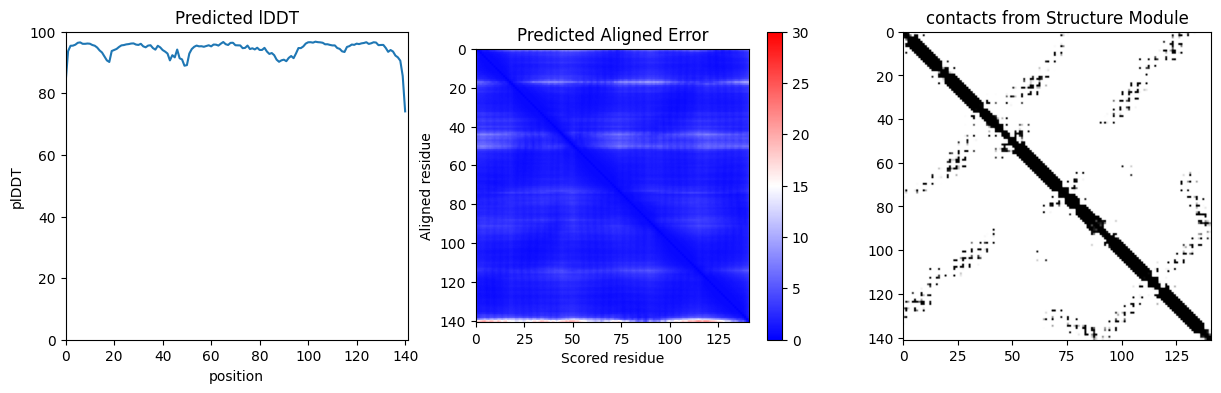

In [3]:
#@title Gráfica de confianza

dpi = 100 #@param {type:"integer"}

def plot_ticks(Ls):
  Ln = sum(Ls)
  L_prev = 0
  for L_i in Ls[:-1]:
    L = L_prev + L_i
    L_prev += L_i
    plt.plot([0,Ln],[L,L],color="black")
    plt.plot([L,L],[0,Ln],color="black")
  ticks = np.cumsum([0]+Ls)
  ticks = (ticks[1:] + ticks[:-1])/2
  plt.yticks(ticks,alphabet_list[:len(ticks)])

def plot_confidence(O, Ls=None, dpi=100):
  if "lm_contacts" in O:
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.subplot(1,4,1)
  else:
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.subplot(1,3,1)

  plt.title('Predicted lDDT')
  plt.plot(O["plddt"])
  if Ls is not None:
    L_prev = 0
    for L_i in Ls[:-1]:
      L = L_prev + L_i
      L_prev += L_i
      plt.plot([L,L],[0,100],color="black")
  plt.xlim(0,O["plddt"].shape[0])
  plt.ylim(0,100)
  plt.ylabel('plDDT')
  plt.xlabel('position')
  plt.subplot(1,4 if "lm_contacts" in O else 3,2)

  plt.title('Predicted Aligned Error')
  Ln = O["pae"].shape[0]
  plt.imshow(O["pae"],cmap="bwr",vmin=0,vmax=30,extent=(0, Ln, Ln, 0))
  if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
  plt.colorbar()
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

  if "lm_contacts" in O:
    plt.subplot(1,4,3)
    plt.title("contacts from LM")
    plt.imshow(O["lm_contacts"],cmap="Greys",vmin=0,vmax=1,extent=(0, Ln, Ln, 0))
    if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
    plt.subplot(1,4,4)
  else:
    plt.subplot(1,3,3)
  plt.title("contacts from Structure Module")
  plt.imshow(O["sm_contacts"],cmap="Greys",vmin=0,vmax=1,extent=(0, Ln, Ln, 0))
  if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
  return plt

plot_confidence(O, Ls=lengths, dpi=dpi)
plt.savefig(f'{prefix}.png',bbox_inches='tight')
plt.show()

In [ ]:

#@title Bajar Archivos para analizar localmente
import shutil
if os.path.exists('resultados'):
  pass
else:
  os.mkdir('resultados')

esmdir = ID + '/'
for pdbsfile in glob.iglob(os.path.join('./', "*.pdb")):
    shutil.copy(pdbsfile, 'resultados')
for jsonfile in glob.iglob(os.path.join('./', "*.json")):
    shutil.copy(jsonfile, 'resultados')
for pngfile in glob.iglob(os.path.join('./', "*.png")):
    shutil.copy(pngfile, 'resultados')
for esmfile in glob.iglob(os.path.join(esmdir, "*")):
    shutil.copy(esmfile, 'resultados')

#@title download predictions
from google.colab import files
os.system(f"zip resultados.zip resultados/*")
files.download(f'resultados.zip')





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Referencias

Mucho del código anterior es gracias a colabfold 👏

Mirdita M, Schütze K, Moriwaki Y, Heo L, Ovchinnikov S and Steinegger M. ColabFold: Making protein folding accessible to all.Nature Methods (2022) doi: 10.1038/s41592-022-01488-1
  
Jumper et al. "Highly accurate protein structure prediction with AlphaFold."
Nature (2021) doi: 10.1038/s41586-021-03819-2



## Powered by @El_Dryosa Si usa el anterior workbook  no olvide citarnos, asi podemos seguir trabajando por la IA en LATAM.
